### Instalasi dan Import Pustaka yang Dibutuhkan

Tahap ini mencakup instalasi serta import pustaka yang dibutuhkan untuk proyek **komparasi algoritma ensemble** dalam klasifikasi teks.

1. **Instalasi Eksternal**
   - `Sastrawi` : Untuk *stopword removal* dan stemming bahasa Indonesia.
   - `xgboost` : Untuk membangun model **Extreme Gradient Boosting**.
   - `wordcloud` : Untuk membuat visualisasi awan kata.

2. **Manipulasi Data dan Visualisasi**
   - `pandas`, `numpy` : Untuk manipulasi data tabular dan numerik.
   - `matplotlib.pyplot`, `seaborn` : Untuk visualisasi data.
   - `WordCloud` : Untuk menampilkan kata-kata yang paling sering muncul.

3. **Pemrosesan Teks**
   - `re`, `string`, `json`, `requests`, `pickle` : Utilitas untuk pemrosesan teks, pengambilan data, dan penyimpanan.
   - `nltk` : Untuk tokenisasi teks dan stopwords (bahasa Inggris).
   - `Sastrawi.StopWordRemoverFactory`, `Sastrawi.StemmerFactory` : Untuk *stopword removal* dan stemming bahasa Indonesia.
   - Dependensi NLTK (`punkt`, `stopwords`) diunduh untuk mendukung tokenisasi dan pengolahan teks.

4. **Pembelajaran Mesin**
   - `RandomForestClassifier`, `AdaBoostClassifier` : Model ensemble berbasis *bagging* dan *boosting*.
   - `XGBClassifier` : Implementasi **Extreme Gradient Boosting**.
   - `TfidfVectorizer` : Mengubah teks menjadi representasi numerik menggunakan *term frequency–inverse document frequency*.
   - `train_test_split` : Membagi data menjadi set latih dan set uji.
   - `SelectKBest`, `chi2` : Untuk seleksi fitur berbasis chi-square.
   - `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `classification_report`, `confusion_matrix`, `roc_auc_score`, `roc_curve` : Metrik untuk evaluasi model.

5. **Lain-lain**
   - `warnings` : Untuk menyembunyikan peringatan selama proses eksekusi.

Dengan pustaka ini, seluruh proses komparasi model ensemble untuk klasifikasi teks dapat dilakukan secara komprehensif dan terstruktur.

In [42]:
# Instalasi pustaka yang dibutuhkan
%pip install Sastrawi xgboost wordcloud nltk

# Pustaka untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Pemrosesan teks
import re
import string
import json
import requests
import pickle
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download as nltk_unduh
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Mengunduh dependensi NLTK
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk_unduh('punkt')
nltk_unduh('stopwords')

# Pustaka untuk pembelajaran mesin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve # Metrik dilengkapi

# Menonaktifkan peringatan sistem
import warnings
warnings.filterwarnings("ignore")

print("Semua pustaka yang dibutuhkan untuk proyek komparasi ensemble berhasil di-import.")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Semua pustaka yang dibutuhkan untuk proyek komparasi ensemble berhasil di-import.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Memuat Dataset Ulasan Aplikasi Grab

Pada tahap ini, dataset ulasan pengguna aplikasi Grab dimuat dari file CSV. Dataset ini sebelumnya telah diambil dari Google Play Store melalui proses scraping dan disimpan di folder `Datasets`.

Dataset yang dimuat berisi dua kolom utama:
- `content`: berisi teks ulasan dari pengguna.
- `score`: berisi nilai rating yang diberikan pengguna terhadap aplikasi (biasanya antara 1–5).

Setelah dimuat ke dalam variabel `data_frame`, beberapa baris pertama dari data ditampilkan untuk memberikan gambaran struktur dan isi dataset yang akan dianalisis.

In [7]:
# Memuat dataset ulasan dari file CSV lokal
file_path = "../Datasets/grab_reviews.csv"
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dari dataset
print("Contoh data ulasan:")
df.head()

Contoh data ulasan:


,content,score
0,kurang menarik karena brang saya ga di kembalikan,3
1,Thanks udah di anterin,5
2,Dengan adanya apk grab perjalan saya dgn tujua...,5
3,sangat membantu,5
4,bagus pelayanan beik dan cepat respon.,5


### Exploratory Data Analysis (EDA)



#### Menampilkan Informasi Umum dan Pengecekan Data Kosong

Tahapan ini bertujuan untuk memahami struktur dataset secara umum dan mengidentifikasi potensi masalah data seperti nilai yang hilang.

Langkah-langkah yang dilakukan:
1. **`df.info()`**: 
   - Menampilkan informasi struktur DataFrame, termasuk jumlah entri, jumlah kolom, tipe data pada setiap kolom, serta jumlah non-null pada masing-masing kolom.
   - Berguna untuk memastikan bahwa dataset telah dimuat dengan benar dan kolom-kolom penting seperti `content` dan `score` tidak kosong.

2. **`df.isnull().sum()`**:
   - Mengecek apakah terdapat nilai kosong (missing values) pada dataset.
   - Hal ini penting untuk memastikan kualitas data sebelum masuk ke tahap preprocessing dan pelatihan model.

Dengan melakukan pengecekan ini sejak awal, kita bisa menghindari error saat pemrosesan data lanjutan atau pelatihan model.

In [8]:
# Menampilkan informasi dasar dari dataset
df.info()

# Mengecek apakah ada nilai kosong di setiap kolom
print("Nilai yang hilang:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20000 non-null  object
 1   score    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
Nilai yang hilang:
content    0
score      0
dtype: int64


#### Visualisasi Distribusi Rating Ulasan

Tahapan ini bertujuan untuk memahami sebaran sentimen pengguna terhadap aplikasi Grab berdasarkan nilai rating (1 hingga 5).

Langkah-langkah yang dilakukan:
1. **Visualisasi dengan `countplot`**:
   - Menggunakan `seaborn.countplot()` untuk menampilkan grafik batang yang menunjukkan jumlah ulasan untuk setiap kategori skor.
   - Warna grafik diatur menggunakan palet `viridis` agar tampil lebih informatif dan menarik.

2. **`value_counts()`**:
   - Menampilkan jumlah absolut dari masing-masing skor (1, 2, 3, 4, 5).
   - Ini membantu mengidentifikasi apakah dataset seimbang (balanced) atau tidak (unbalanced), yang akan sangat memengaruhi kinerja model klasifikasi nantinya.

Distribusi rating sangat penting sebagai dasar pengkategorian sentimen (positif, negatif, netral) dan dapat digunakan untuk menetapkan label kelas pada proses supervised learning.

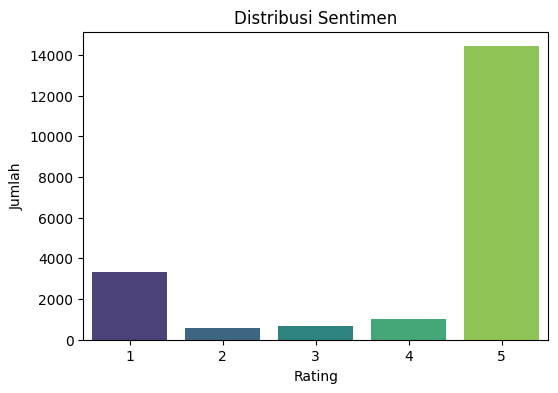

score
5    14420
1     3307
4     1040
3      652
2      581
Name: count, dtype: int64


In [9]:
# Visualisasi distribusi rating pengguna terhadap aplikasi Grab
plt.figure(figsize=(6, 4))
sns.countplot(x=df['score'], palette='viridis')
plt.title("Distribusi Sentimen")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

# Menampilkan jumlah ulasan berdasarkan masing-masing skor
print(df['score'].value_counts())

### Data Preprocessing




#### Fungsi Pembersihan Teks Ulasan

Tahapan ini merupakan bagian awal dari proses **preprocessing teks**. Tujuannya adalah membersihkan teks ulasan agar lebih seragam dan siap digunakan dalam analisis sentimen atau pemodelan machine learning.

Fungsi `proses_teks(teks)` akan melakukan langkah-langkah berikut:

1. **Menghapus mention** – karakter seperti `@username` dihilangkan karena tidak relevan untuk analisis sentimen.
2. **Menghapus hashtag** – seperti `#promo`, yang biasanya digunakan untuk tren, juga tidak memberi nilai tambah dalam analisis.
3. **Menghapus karakter khusus tertentu** – contohnya karakter seperti `²` yang terkadang muncul dari kesalahan ketik atau encoding.
4. **Menghapus angka** – karena dalam banyak kasus, angka tidak memberikan konteks sentimen secara langsung.
5. **Menghapus tanda baca** – agar hasil tokenisasi nanti lebih bersih dan seragam.
6. **Menghapus spasi di awal/akhir** – untuk merapikan hasil pembersihan.
7. **Mengubah teks menjadi huruf kecil semua** – agar tidak ada perbedaan makna antara kata seperti "Bagus" dan "bagus".

Fungsi ini akan menjadi dasar dalam tahap selanjutnya seperti tokenisasi, stopword removal, dan pelabelan sentimen.

In [10]:
# Fungsi untuk membersihkan teks ulasan aplikasi
def proses_teks(teks):
    teks = re.sub(r'@[A-Za-z0-9_]+', '', teks)       # Menghapus mention (@username)
    teks = re.sub(r'#[A-Za-z0-9_]+', '', teks)       # Menghapus hashtag (#hashtag)
    teks = re.sub(r'[²]', ' ', teks)                 # Menghapus karakter khusus tertentu
    teks = re.sub(r'\d+', ' ', teks)                 # Menghapus angka
    teks = re.sub(r'[^\w\s]', ' ', teks)             # Menghapus tanda baca
    teks = teks.strip()                              # Menghapus spasi ekstra
    teks = teks.lower()                              # Konversi ke huruf kecil
    return teks

#### Fungsi Tokenisasi Teks

Tokenisasi adalah proses memecah teks ulasan menjadi unit-unit kata yang disebut token. Tahapan ini sangat penting dalam analisis sentimen karena model pembelajaran mesin memproses teks dalam bentuk token, bukan dalam kalimat utuh.

Penjelasan fungsi `tokenisasi_teks(teks)`:
- Menggunakan `word_tokenize()` dari pustaka NLTK.
- Fungsi ini akan menerima sebuah teks ulasan (yang sudah dibersihkan), lalu mengubahnya menjadi list dari kata-kata individual.
- Contoh: `'layanan sangat cepat dan memuaskan'` akan menjadi `['layanan', 'sangat', 'cepat', 'dan', 'memuaskan']`.

Langkah ini penting sebelum menghilangkan stopword atau melakukan proses pembobotan seperti TF-IDF atau word embedding.

In [11]:
# Fungsi untuk memecah teks menjadi kata-kata (token)
def tokenisasi_teks(teks):
    teks = word_tokenize(teks)  # Mengubah teks menjadi list token
    return teks

#### Fungsi Penghapusan Stopwords

Setelah teks di-tokenisasi, langkah selanjutnya adalah **menghapus stopwords**, yaitu kata-kata umum yang tidak membawa makna penting dalam analisis sentimen. Contohnya seperti: *"dan"*, *"itu"*, *"yang"*.

Fungsi `filter_stopwords(teks)` akan:
1. Memuat daftar stopwords dari Bahasa Indonesia dan Bahasa Inggris menggunakan pustaka `nltk`.
2. Menggabungkan kedua daftar stopwords tersebut agar dapat menangani teks yang menggunakan campuran dua bahasa (umum terjadi pada ulasan aplikasi).
3. Menambahkan daftar stopwords kustom seperti `'iyaa'`, `'gak'`, `'loh'`, `'woy'`, dll, yang sering muncul dalam percakapan informal namun tidak signifikan untuk analisis sentimen.
4. Memfilter kata-kata yang termasuk stopwords dari list token.

Contoh:
- Input: `['pelayanan', 'nya', 'bagus', 'banget']`
- Output: `['pelayanan', 'bagus', 'banget']`

Langkah ini penting untuk menjaga hanya kata-kata bermakna yang digunakan dalam pemodelan.

In [12]:
# Fungsi untuk menghapus stopwords dari list token
def filter_stopwords(teks):
    # Memuat stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords = set(stopwords.words('indonesian'))
    daftar_stopwords_english = set(stopwords.words('english'))

    # Menggabungkan stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords.update(daftar_stopwords_english)

    # Menambahkan stopwords tambahan (umum dalam bahasa informal)
    daftar_stopwords.update([
        'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku',
        'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'
    ])

    # Memfilter token yang bukan stopwords
    hasil_filter = [kata for kata in teks if kata not in daftar_stopwords]

    return hasil_filter

#### Pemrosesan Kata Slang (Bahasa Gaul)

Ulasan pengguna sering kali mengandung **kata slang** atau bahasa gaul yang tidak baku, misalnya:
- `"gk"` untuk `"nggak"`
- `"bgt"` untuk `"banget"`

Kata-kata ini perlu dikonversi ke bentuk baku agar model lebih mudah memahami makna sebenarnya dan meningkatkan akurasi analisis.

**Tahap yang dilakukan:**
1. **Memuat kamus slang**  
   - Kamus slang disimpan dalam file `slangwords.json` yang berasal dari repositori GitHub:  
     [slangwords.json – GitHub](https://raw.githubusercontent.com/azzhrdania/Proyek-Analisis-Sentimen-Gojek/refs/heads/main/Datasets/slangwords.json)  
   - File ini berisi pasangan *key-value* di mana *key* adalah kata slang dan *value* adalah bentuk bakunya.
   - Pada implementasi ini, file disimpan secara lokal di folder `../Datasets/`.

2. **Mengganti kata slang dengan kata baku**  
   - Fungsi `perbaiki_kata_slang(teks)` akan:
     - Memecah teks menjadi kata per kata.
     - Mengecek setiap kata terhadap kamus slang.
     - Mengganti kata slang dengan bentuk baku jika ditemukan.
   - Proses ini menghasilkan teks yang lebih seragam dan siap untuk tahap pra-pemrosesan selanjutnya.

**Contoh:**
- Input: `"aplikasinya bgt bagus"`
- Output: `"aplikasinya banget bagus"`

In [20]:
# Path ke file lokal
path_slang = "../Datasets/slangwords.json"

# Membaca file JSON ke dalam dictionary
with open(path_slang, "r", encoding="utf-8") as f:
    kata_slang = json.load(f)

# Contoh fungsi mengganti kata slang dengan kata baku
def perbaiki_kata_slang(teks):
    kata_kata = teks.split()
    kata_diperbaiki = [
        kata_slang.get(kata.lower(), kata) for kata in kata_kata
    ]
    return ' '.join(kata_diperbaiki)

#### Pipeline Pembersihan dan Normalisasi Teks

Tahapan ini menggabungkan seluruh fungsi preprocessing menjadi satu rangkaian pipeline untuk membersihkan teks ulasan secara komprehensif. Proses ini sangat penting dalam analisis sentimen karena akan meningkatkan akurasi model dalam memahami makna sebenarnya dari teks.

Berikut langkah-langkah yang dilakukan:

1. **Pembersihan dasar teks (`clean_text`)**: Menghapus mention, hashtag, angka, dan tanda baca. Juga mengubah teks menjadi huruf kecil.
2. **Normalisasi slang (`text_slangwords`)**: Mengganti kata-kata tidak baku (slang) menjadi bentuk formal sesuai kamus slang.
3. **Tokenisasi (`text_tokenizing`)**: Memecah teks menjadi kata-kata individual.
4. **Stopword Removal (`text_stopword`)**: Menghapus kata-kata umum yang tidak mengandung makna penting, baik dalam Bahasa Indonesia maupun Inggris.
5. **Penggabungan kembali (`clean_content`)**: Menggabungkan kata-kata hasil filter menjadi satu kalimat bersih yang siap digunakan untuk analisis sentimen.

Kolom akhir yang digunakan dalam proses pelabelan atau model training nantinya adalah `clean_content`.

In [ ]:
# Menggabungkan daftar token menjadi satu kalimat
def gabungkan_ke_kalimat(tokens):
    return ' '.join(tokens)

# Bersihkan teks dan simpan hasilnya di kolom 'clean_text'
df['clean_text'] = df['content'].apply(proses_teks) # Changed 'bersihkan_teks' to 'proses_teks'

# Ganti kata slang dengan kata standar dan simpan di 'text_slangwords'
df['text_slangwords'] = df['clean_text'].apply(perbaiki_kata_slang)

# Tokenisasi teks (pisah menjadi kata-kata) dan simpan di 'text_tokenizing'
df['text_tokenizing'] = df['text_slangwords'].apply(tokenisasi_teks)

# Hapus stopwords (kata umum) dan simpan hasilnya di 'text_stopword'
df['text_stopword'] = df['text_tokenizing'].apply(filter_stopwords)

# Gabungkan token menjadi kalimat dan simpan di 'clean_content'
df['clean_content'] = df['text_stopword'].apply(gabungkan_ke_kalimat)

#### Pembuatan Label Sentimen Awal

Tahap ini bertujuan untuk menyiapkan kolom label sentimen yang akan digunakan pada proses klasifikasi.

**Langkah-langkah:**
1. **Membuat kolom `sentiment`**
   - Ulasan dengan `score` > 3 dilabeli **positif**.
   - Ulasan dengan `score` ≤ 3 dilabeli **negatif**.

2. **Menghapus ulasan netral**
   - Ulasan dengan `score` = 3 dianggap netral dan dihapus dari dataset.
   - Tujuannya adalah untuk membentuk klasifikasi biner (positif vs negatif) yang lebih jelas dan seimbang.

3. **Pemeriksaan hasil**
   - Menampilkan jumlah data sebelum dan sesudah penghapusan rating 3.
   - Menampilkan distribusi jumlah data per kategori sentimen.
   - Menampilkan contoh data untuk verifikasi.

**Contoh:**
- Input skor: `4` → Label: `positif`
- Input skor: `2` → Label: `negatif`
- Input skor: `3` → Dihapus dari dataset

In [24]:
# Membuat kolom sentimen awal
# Ulasan dengan score > 3 dilabeli 'positif', sisanya 'negatif'
df['sentiment'] = np.where(df['score'] > 3, 'positif', 'negatif')

# Menghapus ulasan dengan score 3 (netral) sesuai permintaan
# Ini akan membuat perbedaan antara kelas positif dan negatif lebih jelas untuk model
print(f"Jumlah data sebelum menghapus rating 3: {len(df)}")
df = df[df['score'] != 3].copy()
print(f"Jumlah data setelah menghapus rating 3: {len(df)}")

# Menampilkan jumlah masing-masing kategori sentimen yang baru (setelah penghapusan)
print("\nDistribusi sentimen akhir untuk klasifikasi biner:")
print(df['sentiment'].value_counts())

# Menampilkan beberapa baris untuk verifikasi
display(df[['score', 'sentiment']].head())

Jumlah data sebelum menghapus rating 3: 20000
Jumlah data setelah menghapus rating 3: 19348

Distribusi sentimen akhir untuk klasifikasi biner:
sentiment
positif    15460
negatif     3888
Name: count, dtype: int64


,score,sentiment
1,5,positif
2,5,positif
3,5,positif
4,5,positif
6,2,negatif


#### Visualisasi Distribusi Sentimen Ulasan Grab

Menampilkan diagram pai distribusi ulasan positif dan negatif setelah ulasan netral dihapus, untuk memeriksa proporsi kelas.

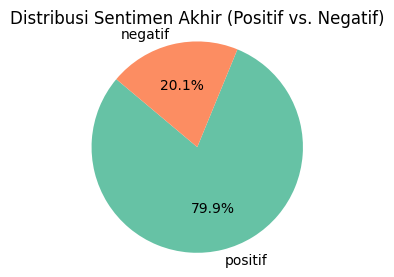

In [29]:
# Hitung jumlah setiap kategori sentimen (sekarang hanya positif dan negatif)
jumlah_sentimen = df['sentiment'].value_counts()

# Tampilkan diagram pai untuk distribusi sentimen yang baru
plt.figure(figsize=(3, 3))
plt.pie(jumlah_sentimen,
        labels=jumlah_sentimen.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Set2"))
plt.title('Distribusi Sentimen Akhir (Positif vs. Negatif)')
plt.axis('equal')
plt.show()

#### Pemisahan Fitur dan Label

Tahap ini memisahkan data menjadi **fitur (X)** dan **label (y)** yang akan digunakan untuk pelatihan model klasifikasi.

**Langkah-langkah:**
1. **Fitur (`X`)**
   - Diambil dari kolom `clean_content`, yaitu teks ulasan yang sudah melalui tahap pembersihan (preprocessing).

2. **Label (`y`)**
   - Diambil dari kolom `sentiment`.
   - Dikodekan menjadi nilai numerik:
     - `positif` → `1`
     - `negatif` → `0`
   - Karena data netral sudah dihapus sebelumnya, hanya dua kelas ini yang perlu dipetakan.

3. **Verifikasi**
   - Menampilkan beberapa contoh nilai `X` dan `y` untuk memastikan pemisahan dan pengkodean label sudah benar.

Proses ini memastikan data siap digunakan pada tahap vektorisasi teks dan pelatihan model.

In [30]:
# Fitur (X) diambil dari teks yang sudah bersih
fitur = df['clean_content']

# Label (y) diambil dari kolom sentimen dan diubah menjadi numerik (1 untuk positif, 0 untuk negatif)
# Karena data 'netral' sudah dihapus, kita hanya perlu memetakan dua kelas ini.
label = df['sentiment'].map({'positif': 1, 'negatif': 0})

# Menampilkan beberapa baris untuk verifikasi
print("Contoh Fitur (X):")
print(fitur.head())
print("\nContoh Label (y) yang sudah di-encode:")
print(label.head())

Contoh Fitur (X):
1                                  thanks udah anterin
2    apk grab perjalan dgn tujuan kemanapun mudah n...
3                                             membantu
4                    bagus pelayanan beik cepat respon
6                                     kaya gojek error
Name: clean_content, dtype: object

Contoh Label (y) yang sudah di-encode:
1    1
2    1
3    1
4    1
6    0
Name: sentiment, dtype: int64


#### Feature Engineering



#### Vektorisasi Teks Menggunakan TF-IDF

Sebelum melatih model machine learning, teks perlu diubah ke bentuk numerik. Di tahap ini, kita gunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengonversi teks menjadi representasi vektor. Ini membantu model mengenali kata-kata yang penting dan membedakan dokumen satu dengan lainnya. Kita batasi hingga 10.000 fitur untuk menjaga efisiensi dan menghindari noise.

In [31]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
fitur_tfidf = tfidf.fit_transform(fitur)

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {fitur_tfidf.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (19348, 9057)


#### Train-Test Split

Membagi data menjadi 80% latih dan 20% uji dengan stratifikasi label untuk menjaga proporsi kelas, serta `random_state=42` agar hasil konsisten.

In [32]:
# --- Pembagian Data (Train-Test Split) ---
X_train, X_test, y_train, y_test = train_test_split(
    fitur_tfidf,
    label,
    test_size=0.2,
    random_state=42,
    stratify=label
)

# Menampilkan jumlah sampel di setiap set untuk verifikasi
print("--- HASIL PEMBAGIAN DATA ---")
print(f"Jumlah Sampel Data Latih (X_train): {X_train.shape[0]}")
print(f"Jumlah Sampel Data Uji (X_test):   {X_test.shape[0]}")
print(f"Jumlah Label Data Latih (y_train): {y_train.shape[0]}")
print(f"Jumlah Label Data Uji (y_test):   {y_test.shape[0]}")

--- HASIL PEMBAGIAN DATA ---
Jumlah Sampel Data Latih (X_train): 15478
Jumlah Sampel Data Uji (X_test):   3870
Jumlah Label Data Latih (y_train): 15478
Jumlah Label Data Uji (y_test):   3870


### Feature Selection

#### Metode yang Digunakan SelectKBest dengan chi2

Tahap ini bertujuan memilih fitur (kata) yang paling relevan terhadap label sentimen menggunakan metode **Chi-Square (χ²)**.

**Alasan penggunaan:**
- Dataset teks setelah diubah menjadi TF-IDF biasanya memiliki ribuan fitur.
- Tidak semua kata memberikan kontribusi yang signifikan terhadap prediksi sentimen.
- Mengurangi jumlah fitur dapat:
  - Mempercepat pelatihan model.
  - Mengurangi risiko overfitting.
  - Mempertahankan kata-kata yang paling informatif.

**Langkah-langkah:**
1. **Menentukan jumlah fitur terbaik**  
   - Dipilih `k = 2000` fitur teratas berdasarkan skor chi-square.

2. **Proses pemilihan fitur**  
   - `fit_transform()` dilakukan **hanya pada data latih** (`X_train`) untuk mencegah *data leakage*.  
   - Data uji (`X_test`) ditransformasi menggunakan selector yang sama.

3. **Hasil akhir**  
   - Menampilkan perbandingan dimensi fitur sebelum dan sesudah feature selection.

Metode ini membantu model fokus pada kata-kata yang secara statistik paling berkaitan dengan sentimen positif atau negatif.


In [33]:
k = 2000
selector = SelectKBest(score_func=chi2, k=k)

# Fit selector pada data latih dan transformasikan data latih
X_train_selected = selector.fit_transform(X_train, y_train)

# Transformasikan data uji menggunakan selector yang sudah di-fit
X_test_selected = selector.transform(X_test)

print("--- HASIL FEATURE SELECTION ---")
print(f"Dimensi fitur sebelum feature selection: {X_train.shape}")
print(f"Dimensi fitur setelah feature selection: {X_train_selected.shape}")

--- HASIL FEATURE SELECTION ---
Dimensi fitur sebelum feature selection: (15478, 9057)
Dimensi fitur setelah feature selection: (15478, 2000)


#### Visualisasi Fitur Terpilih

Tahap ini memvisualisasikan hasil **feature selection** untuk memahami kata-kata mana yang paling berpengaruh dalam menentukan sentimen.

1. **Sumber Data Fitur**
    - Nama fitur diambil dari *vocabulary* `TfidfVectorizer` (`get_feature_names_out()`).
    - Skor Chi-Square diambil dari `selector.scores_` hasil `SelectKBest`.

2. **Visualisasi 1 — *Bar Chart* Fitur Paling Relevan**
    - Menampilkan **20 kata** dengan skor chi-square tertinggi.
    - Skor tinggi menunjukkan kata tersebut memiliki keterkaitan yang kuat dengan label sentimen.
    - Warna menggunakan palet `viridis` untuk perbedaan visual yang jelas.

3. **Visualisasi 2 — Heatmap Korelasi Antar Fitur Terpilih**
    - Mengambil **15 kata teratas** untuk analisis korelasi.
    - Korelasi dihitung berdasarkan matriks TF-IDF.
    - Nilai mendekati `1.00` → kata sering muncul bersama.  
      Nilai mendekati `0` → kata muncul secara independen.
    - Heatmap membantu memahami hubungan antar kata penting dalam teks.

Visualisasi ini membantu kita tidak hanya memilih fitur yang relevan, tetapi juga melihat apakah beberapa kata saling berasosiasi secara kuat di dalam dataset.

--- Visualisasi 1: Fitur Paling Relevan ---


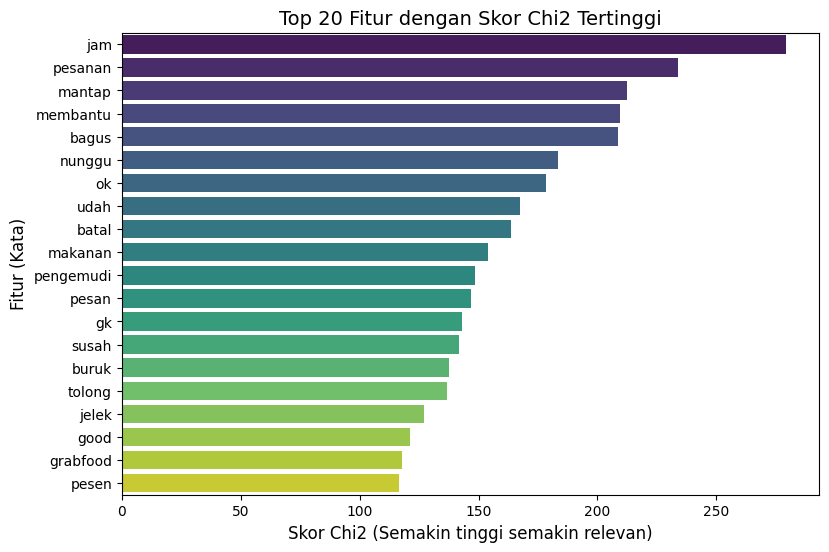


--- Visualisasi 2: Korelasi Antar Fitur Terpilih ---


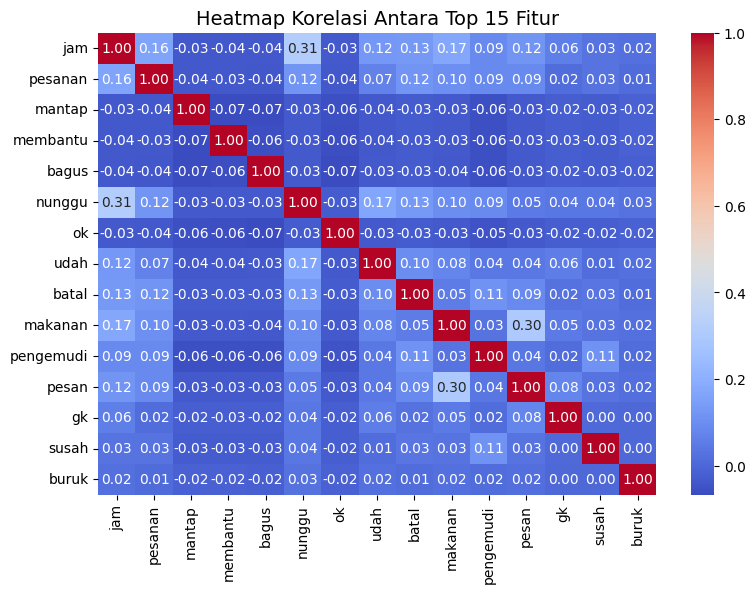

In [37]:
# Mengambil nama fitur asli dari vectorizer TF-IDF
feature_names = np.array(tfidf.get_feature_names_out())
# Mengambil skor dari selector
scores = selector.scores_

# Membuat DataFrame untuk visualisasi skor
scores_df = pd.DataFrame({'Fitur': feature_names, 'Skor Chi2': scores})
scores_df = scores_df.sort_values(by='Skor Chi2', ascending=False)

# Visualisasi 1: Bar Chart Fitur Paling Relevan
# Grafik ini menunjukkan kata-kata mana yang memiliki pengaruh paling kuat terhadap sentimen.
print("--- Visualisasi 1: Fitur Paling Relevan ---")
plt.figure(figsize=(9, 6))
sns.barplot(x='Skor Chi2', y='Fitur', data=scores_df.head(20), palette='viridis')
plt.title('Top 20 Fitur dengan Skor Chi2 Tertinggi', fontsize=14)
plt.xlabel('Skor Chi2 (Semakin tinggi semakin relevan)', fontsize=12)
plt.ylabel('Fitur (Kata)', fontsize=12)
plt.show()


# Visualisasi 2: Heatmap Korelasi Antar Fitur Terpilih
# Heatmap ini menunjukkan apakah kata-kata paling relevan cenderung muncul bersamaan.
# Nilai mendekati 1 (warna terang) berarti sering muncul bersama.
print("\n--- Visualisasi 2: Korelasi Antar Fitur Terpilih ---")

# Ambil nama dari 15 fitur teratas
top_features_names = scores_df.head(15)['Fitur'].tolist()

# Dapatkan indeks dari fitur-fitur ini di matriks TF-IDF asli
top_features_indices = [list(feature_names).index(name) for name in top_features_names]

# Buat DataFrame baru hanya dengan fitur-fitur teratas dari data latih
top_features_df = pd.DataFrame(X_train[:, top_features_indices].toarray(), columns=top_features_names)

# Hitung matriks korelasi
correlation_matrix = top_features_df.corr()

# Buat heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Top 15 Fitur', fontsize=14)
plt.show()


### Model Training & Evaluation

#### Inisialisasi Model Ensemble

Tiga model ensemble didefinisikan untuk dibandingkan performanya:
- **Random Forest** (*Bagging*): banyak pohon keputusan dibangun paralel pada subset data berbeda.
- **XGBoost** (*Gradient Boosting*): pohon dibangun sekuensial untuk memperbaiki kesalahan sebelumnya, akurasi tinggi.
- **AdaBoost** (*Adaptive Boosting*): fokus pada sampel yang salah klasifikasi dengan memberi bobot lebih besar di iterasi berikutnya.

Semua model disimpan dalam dictionary `models` agar mudah dilatih dan dievaluasi.


In [ ]:
# Dictionary untuk menyimpan semua model yang akan dibandingkan.
models = {
    # 1. Random Forest: Pendekatan 'Bagging'
    # Membangun banyak decision tree secara paralel pada subset data yang berbeda.
    # Hyperparameter ini dipertahankan dari eksperimen sebelumnya untuk performa optimal.
    "Random Forest": RandomForestClassifier(
        n_estimators=300,     
        max_depth=None,       
        min_samples_split=5,  
        min_samples_leaf=2,   
        random_state=42        
    ),

    # 2. XGBoost: Pendekatan 'Gradient Boosting'
    # Membangun decision tree secara sekuensial, di mana setiap pohon baru
    # belajar dari kesalahan (residual) pohon sebelumnya. Dikenal karena akurasinya yang tinggi.
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',  
        random_state=42
    ),

    # 3. AdaBoost: Pendekatan 'Adaptive Boosting'
    # Mirip dengan boosting, tetapi fokus pada sampel yang salah diklasifikasikan
    # dengan memberikan bobot yang lebih tinggi pada iterasi berikutnya.
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,      
        random_state=42
    )
}

# Dictionary kosong untuk menyimpan hasil evaluasi yang detail nanti
results = {}

print("Tiga model ensemble (Random Forest, XGBoost, AdaBoost) berhasil diinisialisasi.")
print("Setiap model siap untuk dilatih dan dievaluasi performanya.")

Tiga model ensemble (Random Forest, XGBoost, AdaBoost) berhasil diinisialisasi.
Setiap model siap untuk dilatih dan dievaluasi performanya.


#### Pelatihan & Evaluasi Random Forest

Model **Random Forest** dilatih pada fitur terpilih (`X_train_selected`) dan divalidasi dengan **5-Fold Cross-Validation** untuk mengukur konsistensi akurasi.  

Metrik yang dievaluasi yaitu akurasi latih & uji, precision, recall, F1-score, dan ROC-AUC. Kemudian saya juga menambahkan pengukuran waktu pelatihan dan prediksi untuk analisis efisiensi.

In [ ]:
# Pelatihan dan Evaluasi Random Forest
# Mengambil model Random Forest dari dictionary
model_name = "Random Forest"
model = models[model_name]

print(f"--- Memulai Pelatihan dan Evaluasi untuk {model_name} ---")

# --- Pengukuran Waktu Pelatihan ---
start_time_train = time.time()
model.fit(X_train_selected, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

# --- Validasi Silang (Cross-Validation) ---
print("Menjalankan 5-Fold Cross-Validation...")
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Akurasi Cross-Validation: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# --- Pengukuran Waktu Prediksi ---
start_time_pred = time.time()
y_pred_rf = model.predict(X_test_selected)
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

y_prob_rf = model.predict_proba(X_test_selected)[:, 1]

# --- Menghitung Metrik ---
train_accuracy = model.score(X_train_selected, y_train)
test_accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

# --- Simpan Hasil ---
results[model_name] = {
    "Akurasi Latih": train_accuracy,
    "Akurasi Uji": test_accuracy,
    "Akurasi CV (Mean)": cv_scores.mean(),
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "Waktu Latih (s)": training_time,
    "Waktu Prediksi (s)": prediction_time
}

# --- Tampilkan Laporan ---
print(f"\nLaporan Klasifikasi untuk {model_name} (pada data uji):")
print(classification_report(y_test, y_pred_rf, target_names=['negatif', 'positif']))
print(f"Waktu Pelatihan: {training_time:.2f} detik")
print(f"Waktu Prediksi: {prediction_time:.4f} detik")

--- Memulai Pelatihan dan Evaluasi untuk Random Forest ---
Menjalankan 5-Fold Cross-Validation...
Akurasi Cross-Validation: 0.9207 (+/- 0.0072)

Laporan Klasifikasi untuk Random Forest (pada data uji):
              precision    recall  f1-score   support

     negatif       0.80      0.82      0.81       778
     positif       0.96      0.95      0.95      3092

    accuracy                           0.92      3870
   macro avg       0.88      0.89      0.88      3870
weighted avg       0.92      0.92      0.92      3870

Waktu Pelatihan: 4.97 detik
Waktu Prediksi: 0.3593 detik


#### Pelatihan & Evaluasi XGBoost

Model **XGBoost** dilatih pada fitur terpilih (`X_train_selected`) dan divalidasi menggunakan **5-Fold Cross-Validation** untuk menguji stabilitas performa.  

Metrik yang dievaluasi yaitu akurasi latih & uji, precision, recall, F1-score, dan ROC-AUC. Kemudian saya juga menambahkan pengukuran waktu pelatihan dan prediksi untuk analisis efisiensi.

In [43]:
# Pelatihan dan Evaluasi XGBoost
# Mengambil model XGBoost dari dictionary
model_name = "XGBoost"
model = models[model_name]

print(f"--- Memulai Pelatihan dan Evaluasi untuk {model_name} ---")

# --- Pengukuran Waktu Pelatihan ---
start_time_train = time.time()
model.fit(X_train_selected, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

# --- Validasi Silang (Cross-Validation) ---
print("Menjalankan 5-Fold Cross-Validation...")
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Akurasi Cross-Validation: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# --- Pengukuran Waktu Prediksi ---
start_time_pred = time.time()
y_pred_xgb = model.predict(X_test_selected)
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

y_prob_xgb = model.predict_proba(X_test_selected)[:, 1]

# --- Menghitung Metrik ---
train_accuracy = model.score(X_train_selected, y_train)
test_accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# --- Simpan Hasil ---
results[model_name] = {
    "Akurasi Latih": train_accuracy,
    "Akurasi Uji": test_accuracy,
    "Akurasi CV (Mean)": cv_scores.mean(),
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "Waktu Latih (s)": training_time,
    "Waktu Prediksi (s)": prediction_time
}

# --- Tampilkan Laporan ---
print(f"\nLaporan Klasifikasi untuk {model_name} (pada data uji):")
print(classification_report(y_test, y_pred_xgb, target_names=['negatif', 'positif']))
print(f"Waktu Pelatihan: {training_time:.2f} detik")
print(f"Waktu Prediksi: {prediction_time:.4f} detik")

--- Memulai Pelatihan dan Evaluasi untuk XGBoost ---
Menjalankan 5-Fold Cross-Validation...
Akurasi Cross-Validation: 0.9190 (+/- 0.0085)

Laporan Klasifikasi untuk XGBoost (pada data uji):
              precision    recall  f1-score   support

     negatif       0.84      0.74      0.78       778
     positif       0.94      0.96      0.95      3092

    accuracy                           0.92      3870
   macro avg       0.89      0.85      0.87      3870
weighted avg       0.92      0.92      0.92      3870

Waktu Pelatihan: 0.66 detik
Waktu Prediksi: 0.0100 detik


#### Pelatihan & Evaluasi AdaBoost

Model **AdaBoost** dilatih pada fitur terpilih (`X_train_selected`) dan divalidasi menggunakan **5-Fold Cross-Validation** untuk menilai konsistensi performa.  

Metrik yang dievaluasi mencakup akurasi latih & uji, precision, recall, F1-score, dan ROC-AUC. Kemudian saya juga menambahkan pengukuran waktu pelatihan dan prediksi untuk membandingkan efisiensi model dengan Random Forest dan XGBoost.


In [44]:
# Pelatihan dan Evaluasi AdaBoost
# Mengambil model AdaBoost dari dictionary
model_name = "AdaBoost"
model = models[model_name]

print(f"--- Memulai Pelatihan dan Evaluasi untuk {model_name} ---")

# --- Pengukuran Waktu Pelatihan ---
start_time_train = time.time()
model.fit(X_train_selected, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train

# --- Validasi Silang (Cross-Validation) ---
print("Menjalankan 5-Fold Cross-Validation...")
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Akurasi Cross-Validation: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# --- Pengukuran Waktu Prediksi ---
start_time_pred = time.time()
y_pred_ada = model.predict(X_test_selected)
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred

y_prob_ada = model.predict_proba(X_test_selected)[:, 1]

# --- Menghitung Metrik ---
train_accuracy = model.score(X_train_selected, y_train)
test_accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)
roc_auc = roc_auc_score(y_test, y_prob_ada)

# --- Simpan Hasil ---
results[model_name] = {
    "Akurasi Latih": train_accuracy,
    "Akurasi Uji": test_accuracy,
    "Akurasi CV (Mean)": cv_scores.mean(),
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "Waktu Latih (s)": training_time,
    "Waktu Prediksi (s)": prediction_time
}

# --- Tampilkan Laporan ---
print(f"\nLaporan Klasifikasi untuk {model_name} (pada data uji):")
print(classification_report(y_test, y_pred_ada, target_names=['negatif', 'positif']))
print(f"Waktu Pelatihan: {training_time:.2f} detik")
print(f"Waktu Prediksi: {prediction_time:.4f} detik")

--- Memulai Pelatihan dan Evaluasi untuk AdaBoost ---
Menjalankan 5-Fold Cross-Validation...
Akurasi Cross-Validation: 0.8477 (+/- 0.0070)

Laporan Klasifikasi untuk AdaBoost (pada data uji):
              precision    recall  f1-score   support

     negatif       0.78      0.33      0.47       778
     positif       0.85      0.98      0.91      3092

    accuracy                           0.85      3870
   macro avg       0.81      0.65      0.69      3870
weighted avg       0.84      0.85      0.82      3870

Waktu Pelatihan: 1.08 detik
Waktu Prediksi: 0.0651 detik


#### Komparasi Hasil Evaluasi Komparatif Model

Pada tahap ini, seluruh model **Random Forest**, **XGBoost**, dan **AdaBoost** yang sudah dilatih dan diuji 
akan dibandingkan secara langsung berdasarkan metrik-metrik evaluasi berikut:

- **Akurasi (Accuracy)** → Persentase prediksi benar dari total data uji.  
- **Precision** → Persentase prediksi positif yang benar-benar positif (mengukur ketepatan).  
- **Recall** → Persentase data positif yang berhasil terdeteksi model (mengukur kelengkapan).  
- **F1-Score** → Rata-rata harmonis dari Precision dan Recall, baik untuk data tidak seimbang.  
- **ROC-AUC** → Luas area di bawah kurva ROC; mengukur kemampuan model membedakan kelas.  
- **Waktu Latih (s)** → Durasi yang dibutuhkan model untuk proses pelatihan pada data latih.  
- **Waktu Prediksi (s)** → Durasi yang dibutuhkan model untuk melakukan prediksi pada data uji.  

In [47]:
# Hasil Evaluasi Komparatif
# Mengonversi dictionary hasil menjadi DataFrame pandas
results_df = pd.DataFrame(results).T

# Mengganti nama kolom 'Akurasi Uji' menjadi 'Akurasi' agar sesuai
results_df = results_df.rename(columns={'Akurasi Uji': 'Akurasi'})

# Memilih dan mengatur urutan kolom sesuai dengan format berikut
report_table = results_df[['Akurasi', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Waktu Latih (s)', 'Waktu Prediksi (s)']].copy()

# Mengatur format angka menjadi 4 desimal agar konsisten
pd.options.display.float_format = '{:.4f}'.format

# Menampilkan tabel hasil akhir
print("--- Tabel Perbandingan Performa Model ---")
display(report_table)

--- Tabel Perbandingan Performa Model ---


,Akurasi,Precision,Recall,F1-Score,ROC-AUC,Waktu Latih (s),Waktu Prediksi (s)
Random Forest,0.9238,0.9554,0.9489,0.9521,0.9640,4.9700,0.3593
XGBoost,0.9183,0.9359,0.9638,0.9496,0.9596,0.6610,0.0100
AdaBoost,0.8465,0.8532,0.9757,0.9104,0.8982,1.0768,0.0651


#### Penentuan Model Terbaik

Pada tahap ini, setiap model diberi **peringkat** berdasarkan nilai lima metrik evaluasi.  
Model dengan nilai tertinggi pada suatu metrik mendapat peringkat 1, berikutnya peringkat 2, dan seterusnya.  

Selanjutnya, semua peringkat dijumlahkan menjadi **Total Rank**.  
**Model terbaik** adalah model dengan **Total Rank terkecil**, karena artinya model tersebut konsisten unggul di banyak metrik sekaligus.

In [ ]:
# Menentukan Model Terbaik Menggunakan Sistem Peringkat

# 1. Buat DataFrame baru untuk menyimpan peringkat
rank_df = pd.DataFrame()

# 2. Hitung peringkat untuk setiap metrik (nilai lebih tinggi = peringkat 1)
metrics_to_rank = ['Akurasi', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for metric in metrics_to_rank:
    rank_df[f'{metric} Rank'] = report_table[metric].rank(ascending=False)

# 3. Jumlahkan peringkat untuk mendapatkan skor total (skor lebih rendah = lebih baik)
rank_df['Total Rank'] = rank_df.sum(axis=1)

# 4. Urutkan berdasarkan Total Rank untuk menemukan model terbaik
sorted_ranks = rank_df.sort_values(by='Total Rank', ascending=True)

# 5. Mengambil nama model terbaik dari baris pertama tabel yang sudah diurutkan
best_model_name = sorted_ranks.index[0]

# Menampilkan tabel peringkat untuk justifikasi
print("\n--- Tabel Peringkat Model Berdasarkan Semua Metrik ---")
display(sorted_ranks)

print(f"\nModel terbaik berdasarkan sistem ranking dengan jumlah poin terkecil sebagai pemenang adalah {best_model_name}")


--- Tabel Peringkat Model Berdasarkan Semua Metrik ---


,Akurasi Rank,Precision Rank,Recall Rank,F1-Score Rank,ROC-AUC Rank,Total Rank
Random Forest,1.0000,1.0000,3.0000,1.0000,1.0000,7.0000
XGBoost,2.0000,2.0000,2.0000,2.0000,2.0000,10.0000
AdaBoost,3.0000,3.0000,1.0000,3.0000,3.0000,13.0000



Model terbaik berdasarkan sistem ranking dengan jumlah poin terkecil sebagai pemenang adalah Random Forest


#### Menyimpan Artefak Model Terbaik

Setelah model terbaik ditentukan, langkah ini menyimpan tiga komponen penting:
1. **Model Terbaik** – hasil pelatihan yang siap digunakan untuk prediksi.
2. **TF-IDF Vectorizer** – alat untuk mengubah teks mentah menjadi representasi numerik.
3. **Feature Selector** – memilih fitur-fitur paling relevan dari data.

Semua artefak disimpan dalam format `.pkl` agar dapat dimuat kembali tanpa perlu melatih ulang.


In [51]:
# Menyimpan Artefak Berdasarkan Model Terbaik yang Telah Ditentukan
# Mengambil objek model terbaik dari dictionary 'models'
best_model = models[best_model_name]

# Menyimpan model terbaik, vectorizer, dan feature selector menggunakan pickle
with open("../Models/best_ensemble_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("../Models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("../Models/feature_selector.pkl", "wb") as f:
    pickle.dump(selector, f)

print(f"\nArtefak untuk model '{best_model_name}' berhasil disimpan:")
print("- Model terbaik disimpan di ../Models/best_ensemble_model.pkl")
print("- Vectorizer TF-IDF disimpan di ../Models/tfidf_vectorizer.pkl")
print("- Feature Selector disimpan di ../Models/feature_selector.pkl")


Artefak untuk model 'Random Forest' berhasil disimpan:
- Model terbaik disimpan di ../Models/best_ensemble_model.pkl
- Vectorizer TF-IDF disimpan di ../Models/tfidf_vectorizer.pkl
- Feature Selector disimpan di ../Models/feature_selector.pkl


#### Menyimpan Daftar Library (requirements.txt)

Langkah ini membuat file `requirements.txt` berisi **daftar lengkap library dan versinya**  
yang digunakan di lingkungan kerja saat ini untuk memudahkan dibuat di perangkat lain atau saat deployment.

In [ ]:
# Menyimpan Semua Library ke dalam File requirements.txt
!pip freeze > ../requirements.txt
print("File requirements.txt berhasil dibuat.")

File requirements.txt berhasil dibuat.
